# Data Science and Business Analytics (GRIPMay 21 )

**Author : Ms Prajakta Pramod Gaonkar.**

# Task 1

Prediction using Supervised ML

# Methodology

1. Understanding the 'Problem statement' and 'Dataset'

2. Extracting the features and labels from the dataset

3. Identifying the type of the problem

4. Selecting the right model

5. Train and test the model

6. Evaluate the model

# Step 1. Understanding the 'Problem Statement' and 'Dataset'

**Problem Statement**

Predicting the percentage of a student based on the number of study hours

**Importing packages and data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = "http://bit.ly/w-data"
score_data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [4]:
score_data 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [33]:
score_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [34]:
score_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
score_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
score_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
score_data.shape

(25, 2)

In [11]:
score_data.size

50

In [12]:
score_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [14]:
score_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
score_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


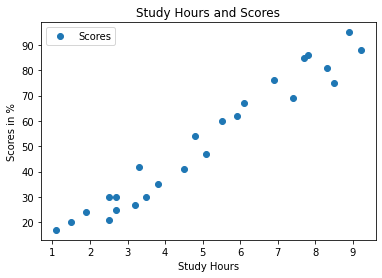

In [16]:
score_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Study Hours and Scores')  
plt.xlabel('Study Hours')  
plt.ylabel('Scores in %')  
plt.show()

# Step 2. Extracting the features and labels from the dataset

In [17]:
X = score_data.iloc[:, :-1].values  
y = score_data.iloc[:, 1].values

In [18]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [19]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Step 3. Identifying the type of the problem

As per the problem statement we have to predict the score based on the given number of study hours. Here, we have 'Hours' as 
an independent variable and 'Scores' as a dependent variable. Therefore, as shown above, we could extract the feature -'Hours'
as X and the label- 'Scores' as y. Hence, this is a supervised learning problem, wherein both the features and labels are 
present.

# Step 4. Selecting the right model

Given data is a continuous data having only two variables, hence we will perform a simple linear regression analysis.

# Step 5. Train and test the model

In [20]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
print("The LR model co-efficients is : ", regressor.coef_)

The LR model co-efficients is :  [9.91065648]


In [23]:
print("The LR model co-efficients is : ", regressor.intercept_)

The LR model co-efficients is :  2.018160041434683


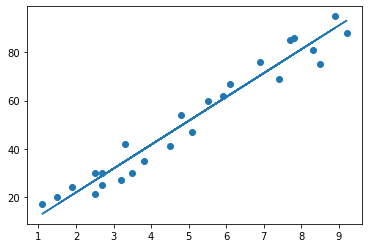

In [24]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [25]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [26]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [27]:
hours = 9.25
hours = np.array(hours).reshape(1,1)

In [28]:
own_pred = regressor.predict(hours)

In [29]:
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


The model has predicted that if a student studies for 9.25 hrs a day, then he will secure a score of 93.69.

# Step 6. Evaluating the model

In [30]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


The predicted values differ from the actual value by 4.18.